# WFE and PSF Metrics for VisMCAO
2000 actuators, 6 LGS (7mag), 1 TT (8mag)

In [ ]:
from paarti.utils import maos_utils
import matplotlib.pyplot as plt
#from bpeck.mcao import act_study

In [3]:
maos_utils.print_psf_metrics_x0y0(seed=1)

Looking in ./ for simulation results...
Wavelength Strehl  FWHM_gaus   FWHM_emp r_EE80
(microns)              (mas)      (mas)  (mas)
     0.432   0.13       10.3       11.2   54.1
     0.544   0.26       12.7       13.0   44.9
     0.652   0.39       14.7       15.0   33.9
     0.810   0.54       17.4       18.1   34.7
     0.877   0.59       18.4       19.5   34.8
     1.020   0.68       20.5       22.4   37.4
     1.248   0.77       24.7       27.0   45.8
     1.673   0.86       32.1       35.8   56.2
     2.200   0.92       42.2       46.9   73.9


(array([0.432, 0.544, 0.652, 0.81 , 0.877, 1.02 , 1.248, 1.673, 2.2  ]),
 array([0.13085756, 0.25953947, 0.38881084, 0.54067409, 0.59142651,
        0.67773959, 0.77082856, 0.86497014, 0.91947414]),
 array([10.3200147 , 12.72195428, 14.74207289, 17.44189088, 18.3940207 ,
        20.50765456, 24.7199261 , 32.11827686, 42.23569428]),
 array([11.22618806, 12.97493173, 15.04546893, 18.13278115, 19.46565397,
        22.35059389, 27.02057029, 35.84008852, 46.86794881]),
 array([54.12382667, 44.88318   , 33.87023333, 34.65247333, 34.83887333,
        37.40268   , 45.7632    , 56.2353    , 73.9497    ]))

In [2]:
#act_study.print_mag_to_flux(2000, 6000, 1000, 7, 8)

In [4]:
total = maos_utils.print_wfe_metrics(seed=1)

Looking in directory: ./
---------------------
WaveFront Error (nm): [note, piston removed from all]
---------------------
Field Avg        Total   High_Order           TT
---------  -----------   ----------   ----------
Open             883.8        836.4        285.7
Closed           363.1        351.3         91.6

Pos  0 
-------  
Open             945.7        859.4        394.5
Closed           110.1         96.5         53.0

Pos  1 
-------  
Open             931.8        856.0        368.2
Closed           124.0        111.5         54.2

Pos  2 
-------  
Open             913.6        847.8        340.5
Closed           130.7        119.0         54.2

Pos  3 
-------  
Open             895.6        839.6        311.6
Closed           128.5        117.0         53.1

Pos  4 
-------  
Open             879.0        832.6        281.8
Closed           161.5        153.0         51.5

Pos  5 
-------  
Open             865.1        827.6        252.1
Closed           219.5      

/Users/jlu/pycode/paarti/paarti/utils/maos_utils.py:557: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if results_xx != None:


## WFE: Total, Tip-Tilt and High-Order

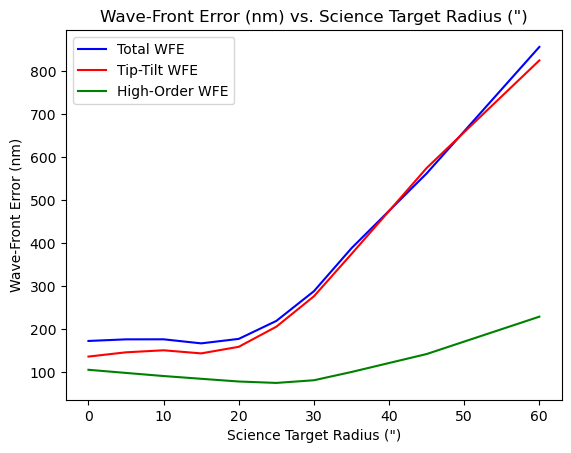

In [4]:
total_wfe = [173.0, 176.7, 176.8, 167.4, 177.8, 219.5, 288.5, 388.4, 562.1, 856.0]
tt_wfe = [136.7, 146.6, 151.3, 144.1, 159.4, 206.1, 276.7, 375.0, 574.7, 824.7]
truth_wfe = [106.0, 98.7, 91.5, 85.1, 78.8, 75.5, 81.7, 100.9, 142.6, 229.4]

psf = [0, 5, 10, 15, 20, 25, 30, 35, 45, 60]
plt.plot(psf, total_wfe, color='blue', label="Total WFE")
plt.plot(psf, tt_wfe, color='red', label="Tip-Tilt WFE")
plt.plot(psf, truth_wfe, color='green', label="High-Order WFE" )
plt.title('Wave-Front Error (nm) vs. Science Target Radius (")')
plt.xlabel('Science Target Radius (")')
plt.ylabel("Wave-Front Error (nm)")
plt.legend()
plt.show()

## Setup

In [5]:
import pylab as plt
import numpy as np
from paarti.utils import maos_utils
from paarti import psfs, psf_plots

psf_x = [0, 5, 10, 15, 20, 25, 30, 35, 45, 60]  # arcsec
psf_y = [0, 0,  0,  0,  0,  0,  0,  0,  0,  0]  # arcsec
psf_wvl = [432, 544, 652, 810, 877, 1020, 1248, 1673, 2200]

seed = 1

%matplotlib inline

In [6]:
mets = maos_utils.get_psf_metrics_over_field(seed=seed)
x, y, w, strehl, fwhm_g, fwhm_e, r_ee50, r_ee80 = mets

Looking in ./ for simulation results...
xx =  0 yy =  0
xx =  5 yy =  0
xx =  10 yy =  0
xx =  15 yy =  0
xx =  20 yy =  0
xx =  25 yy =  0
xx =  30 yy =  0
xx =  35 yy =  0
xx =  45 yy =  0
xx =  60 yy =  0


In [7]:
x.shape

(10, 9)

## Strehl

Text(0.5, 1.0, 'Science Target Radius (") vs. Strehl')

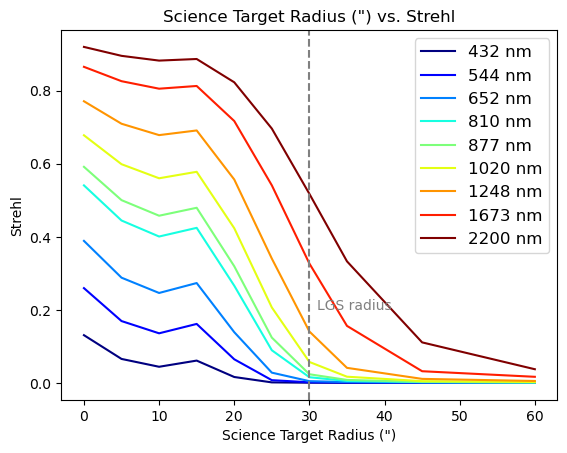

In [8]:
n_wvl = x.shape[1]
colors = plt.cm.jet(np.linspace(0,1,n_wvl))

plt.figure(1)

for ww in range(n_wvl):
    label = f'{w[0, ww]*1e3:3.0f} nm'
    plt.plot(x[:, ww], strehl[:, ww], color=colors[ww], label=label)    

plt.legend(fontsize=12)
plt.xlabel('Science Target Radius (")')
plt.ylabel('Strehl')
plt.axvline(30, linestyle='--', color='grey')
plt.text(31, 0.2, 'LGS radius', color='grey')
plt.title('Science Target Radius (") vs. Strehl')

## Empirical FWHM

Text(0.5, 1.0, 'Science Target Radius (") vs. Emp. FWHM (mas)')

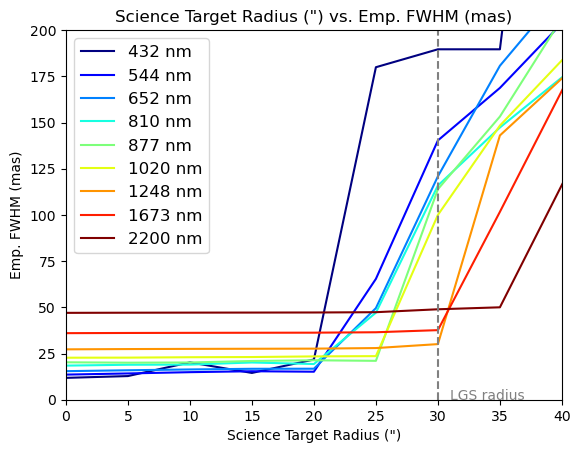

In [8]:
n_wvl = x.shape[1]
colors = plt.cm.jet(np.linspace(0,1,n_wvl))

plt.figure(1)

for ww in range(n_wvl):
    label = f'{w[0, ww]*1e3:3.0f} nm'
    plt.plot(x[:, ww], fwhm_e[:, ww], color=colors[ww], label=label)    

plt.legend(fontsize=12)
plt.xlabel('Science Target Radius (")')
plt.ylabel('Emp. FWHM (mas)')
plt.axvline(30, linestyle='--', color='grey')
plt.xlim(0, 40)
plt.ylim(0, 200)
plt.text(31, 0.2, 'LGS radius', color='grey')
plt.title('Science Target Radius (") vs. Emp. FWHM (mas)')

## Encircled Energy (50 and 80)

Text(0.5, 1.0, 'Science Target Radius (") vs. EE80 Radius (mas)')

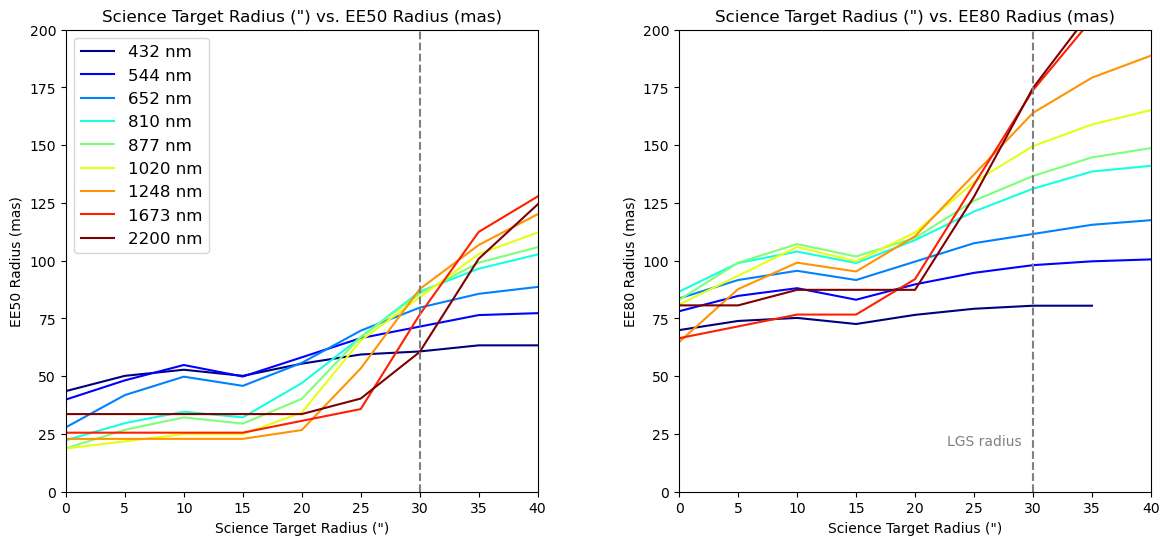

In [9]:
n_wvl = x.shape[1]
colors = plt.cm.jet(np.linspace(0,1,n_wvl))

fig, axs = plt.subplots(1, 2, figsize=(14, 6))
fig.subplots_adjust(wspace=0.3)
    
for ww in range(n_wvl):
    label = f'{w[0, ww]*1e3:3.0f} nm'
    axs[0].plot(x[:, ww], r_ee50[:, ww], color=colors[ww], label=label)    
    axs[1].plot(x[:, ww], r_ee80[:, ww], color=colors[ww])    

axs[0].legend(fontsize=12)
axs[0].set_xlabel('Science Target Radius (")')
axs[1].set_xlabel('Science Target Radius (")')
axs[0].set_ylabel('EE50 Radius (mas)')
axs[1].set_ylabel('EE80 Radius (mas)')
axs[0].axvline(30, linestyle='--', color='grey')
axs[1].axvline(30, linestyle='--', color='grey')
axs[0].set_xlim(0, 40)
axs[0].set_ylim(0, 200)
axs[1].set_xlim(0, 40)
axs[1].set_ylim(0, 200)
axs[1].text(29, 20, 'LGS radius', color='grey', ha='right')
axs[0].set_title('Science Target Radius (") vs. EE50 Radius (mas)')
axs[1].set_title('Science Target Radius (") vs. EE80 Radius (mas)')

In [11]:
maos_utils.print_psf_metrics_x0y0(seed=1)

Looking in ./ for simulation results...
Wavelength Strehl  FWHM_gaus   FWHM_emp r_EE80
(microns)              (mas)      (mas)  (mas)
     0.432   0.13       10.3       11.2   54.1
     0.544   0.26       12.7       13.0   44.9
     0.652   0.39       14.7       15.5   33.9
     0.810   0.54       17.4       18.1   34.7
     0.877   0.59       18.4       19.5   34.8
     1.020   0.68       20.5       22.4   37.4
     1.248   0.77       24.7       27.0   45.8
     1.673   0.86       32.1       35.8   56.2
     2.200   0.92       42.2       46.9   73.9


(array([0.432, 0.544, 0.652, 0.81 , 0.877, 1.02 , 1.248, 1.673, 2.2  ]),
 array([0.13085756, 0.25953947, 0.38881084, 0.54067409, 0.59142651,
        0.67773959, 0.77082856, 0.86497014, 0.91947414]),
 array([10.3200147 , 12.72195428, 14.74207289, 17.44189088, 18.3940207 ,
        20.50765456, 24.7199261 , 32.11827686, 42.23569428]),
 array([11.23428187, 13.02138785, 15.52267925, 18.13278115, 19.46565397,
        22.35059389, 27.02057029, 35.84008852, 46.86794881]),
 array([54.12382667, 44.88318   , 33.87023333, 34.65247333, 34.83887333,
        37.40268   , 45.7632    , 56.2353    , 73.9497    ]))